![satacad](./images/satacadlogo.gif)
TOC: [1](./mm1.ipynb)  [2](./mm2.ipynb)  [3](./mm3.ipynb)  [4](./mm4.ipynb) [5](./mm5.ipynb)


## TETRAVOLUME REFRESHER

Understanding Martian Math may require a refresher in some of the ideas popularized by R. Buckminster Fuller in his *Synergetics* volumes.

This page is a "scratch pad" where you might want to test new ideas.  That's what I do.  Once you branch off, you may do as you wish, pushing to a Github site of your own in some cases.

As I mention in the video below, I was tracking the project by Koski & Co. to work with the synergetics modules to build two kinds of identity:  

* those that express mathematical equivalence and 
* those with the additional feature of assembling geometricaly (physically, sculpturally) from the given components.

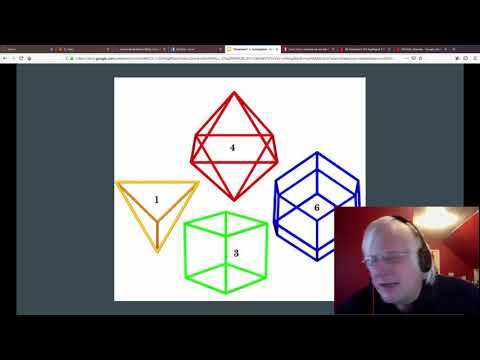

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("tTgO-_PiUCQ")

![A &amp; B modules](./images/abmod.gif )

The above graphic by Richard Hawkins has appeared since the 1990s at my Synergetics on the Web.  That's a regular tetrahedron on the left, taken to be unit volume, and an octahedron of volume 4 with same edge lengths (silver).  In both cases, we establish the center point and radii to the vertexes.  

Subdivide the subvolumes so formed using edge midpoints and base center altitutes to these respective centers of volume.  

The regions so formed on the octahedron already contain room for the A modules we get from the tetrahedron, with the difference remaining defining the B modules.  

Both A and B have the same volume relative to the UVT (unit volume tetrahedron): 1/24.

When we dissect the volume 3 cube according to a similar algorithm, we get half-MITE orthoschemes of volume 1/16.  24 MITEs make the unit volume cube.  See page one for a magnetic MITE toy available for purchase.

We now turn to gmpy2 for some high precision computations...

In [2]:
import tetvols
import gmpy2
gmpy2.get_context().precision=200
root2 = gmpy2.sqrt(2)
root7 = gmpy2.sqrt(7)
root6 = gmpy2.sqrt(6)
root5 = gmpy2.sqrt(5)
root3 = gmpy2.sqrt(3)
Ø = (1 + root5)/2

![A &amp; B modules](./images/a_b_modules.gif )

In [3]:
# A Module
a = 1
BE = a * root6/4
BF = a * root3/3
BG = a / 2
EF = a * root6/12
FG = a * root3/6
GE = a * root2/4

Amod = tetvols.ivm_volume((BE, BF, BG, EF, FG, GE))
print("Amod: {:60.57}".format(Amod))

Amod:  0.041666666666666666666666666666666666666666666666666666667


In [4]:
# B Module
a = 1
BE = a * root6/4
BA = a * root2/2
BG = a / 2
EA = a * root6/12
AG = a / 2
GE = a * root2/4

Amod = tetvols.ivm_volume((BE, BF, BG, EF, FG, GE))
print("Amod: {:60.57}".format(Amod))

Amod:  0.041666666666666666666666666666666666666666666666666666667


In [5]:
# Synergetics modules
S  = Smod = (Ø **-5)/2
s3 = Smod * (Ø **-3)
s6 = s3 * (Ø **-3)
S3 = Smod * (Ø ** 3)
S6 = S3 * (Ø ** 3)
Emod = (root2/8) * (Ø ** -3)
Tmod = gmpy2.mpq(1,24)
Syn3 = gmpy2.sqrt(gmpy2.mpq(9, 8))
sfactor = Smod/Emod
efactor = Emod/Tmod
print("sfactor: {:60.57}".format(sfactor))
print("efactor: {:60.57}".format(efactor))

sfactor:  1.080363026950905814406172628196375701989460486805627392673
efactor:  1.001551606266567703186548288039967129740634165713962041512


In [6]:
print(efactor * Tmod)
print(Emod)

0.041731316927773654299439512001665297072526423571415085063018204
0.041731316927773654299439512001665297072526423571415085063018204


In [7]:
gap_factor = gmpy2.root(gmpy2.mpq(2,3), 3) * Ø/root2
print("Tradius: {:60.57}".format(gap_factor)) # published in vol 2
print("efactor: {:60.57}".format(1/gap_factor ** 3))
print("efactor: {:60.57}".format(gmpy2.mpq(3,2) * (root2/Ø)**3))

Tradius:  0.999483332262343440046426027681421595381801474075353341769
efactor:  1.001551606266567703186548288039967129740634165713962041512
efactor:  1.001551606266567703186548288039967129740634165713962041512


![S module a](./images/f8813a.gif)

![S module c](./images/f8813c.gif)

These graphics are directly from the original two volumes by way of the web copy.  The A, B, S, T & E modules are all fully defined by Volume 2.  The use of phi (Ø) as a labeled number is absent from Fuller's writing as he disciplined himself to start over in some ways and not use ancient Greek letters, partly in an effort to not alienate humanities readers.

In [8]:
# S module
FH = 1/Ø
FE = sfactor/2
FG = root3 * FE/2
# connecting the base (same order, i.e. H, E, G)
HE = (3 - root5)/2
EG = FE/2
GH = EG

Smod = tetvols.ivm_volume((FH, FE, FG, HE, EG, GH))
print("smod: {:60.57}".format(Smod))

smod:  0.045084971874737120511467085914095294300772949514407155339


In [9]:
t = tetvols.xyz_volume((1, 1, 1, 1, 1, 1), Syn3 = Syn3)
print("Tetrahedron (XYZ): {:60.57}".format(t))

Tetrahedron (XYZ):  0.942809041582063365867792482806465385713114583584632048784


In [10]:
r1 = 24*Smod - 1 # 24 Amod
r2 = 7*s3 + 3*s6
print("r1: {:60.57}".format(r1))
print("r2: {:60.57}".format(r2))

r1:  0.082039324993690892275210061938287063218550788345771728127
r2:  0.082039324993690892275210061938287063218550788345771728127


In [11]:
r1 = 120*Smod - 5 # 120 * Tmod
r2 = 35*s3 + 15*s6
print("r1: {:60.57}".format(r1))
print("r2: {:60.57}".format(r2))

r1:  0.410196624968454461376050309691435316092753941728858640635
r2:  0.410196624968454461376050309691435316092753941728858640635


In [12]:
print("Octa          : {:60.57}".format(4*S6 + 4*S3))    # JB octahedron
print("Cube          : {:60.57}".format(3*S6 + 3*S3)) 

Octa          :  4.000000000000000000000000000000000000000000000000000000000
Cube          :  3.000000000000000000000000000000000000000000000000000000000


"The cube of volume 3 can have its volume expressed as 63S+15s3.
The Icosahedron within the volume 4 Octahedron is 60S+20s3.
The difference is 7s3+3s6". -- DK

In [13]:
print("Cube          : {:60.57}".format(63*S+15*s3)) 

Cube          :  3.000000000000000000000000000000000000000000000000000000000


In [14]:
cubocta = gmpy2.mpq(5, 2)                  # 2.5 as a fraction  
Icosa_within = cubocta * sfactor ** 2      # inscribed in Octa 4
print("IcosaWithin   : {:60.57}".format(Icosa_within))

IcosaWithin   :  2.917960675006309107724789938061712936781449211654228271873


In [15]:
Icosa_within = 60*S + 20*s3      
print("Icosa in Octa4: {:60.57}".format(Icosa_within))     # inscribed in Octa 4

Icosa in Octa4:  2.917960675006309107724789938061712936781449211654228271873


If you're looking for a more complete volumes table and/or additional material on S module identities, I recommend this additional Jupyter Notebook, which in turn links to another at the bottom:

[Compound Five Octahedra](https://nbviewer.jupyter.org/github/4dsolutions/Python5/blob/master/CompoundFiveOctahedra.ipynb)